In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('./secondary_data.csv', sep=';')

In [3]:
train.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w


In [4]:
train.shape

(61069, 21)

In [5]:
train.columns

Index(['class', 'cap-diameter', 'cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
       'stem-height', 'stem-width', 'stem-root', 'stem-surface', 'stem-color',
       'veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color',
       'habitat', 'season'],
      dtype='object')

In [6]:
null_values = pd.DataFrame(train.isnull().sum(), columns=['Total'])
null_values['Percentage'] = (null_values['Total'] * 100) / train.shape[0]
null_values

,Total,Percentage
class,0,0.000000
cap-diameter,0,0.000000
cap-shape,0,0.000000
cap-surface,14120,23.121387
cap-color,0,0.000000
does-bruise-or-bleed,0,0.000000
gill-attachment,9884,16.184971
gill-spacing,25063,41.040462
gill-color,0,0.000000
stem-height,0,0.000000


In [7]:
train.drop(['stem-root', 'veil-type', 'veil-color', 'spore-print-color'], axis=1, inplace=True)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-surface          22945 non-null  object 
 12  stem-color            61069 non-null  object 
 13  has-ring              61069 non-null  object 
 14  ring-type             58598 non-null  object 
 15  habitat            

In [9]:
train['class'].value_counts()

p    33888
e    27181
Name: class, dtype: int64

c:\Users\Bhanu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


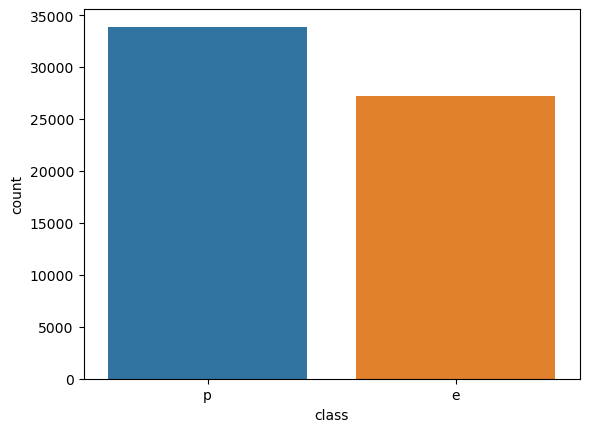

In [10]:
sns.countplot(train['class'], data=train)
plt.show()

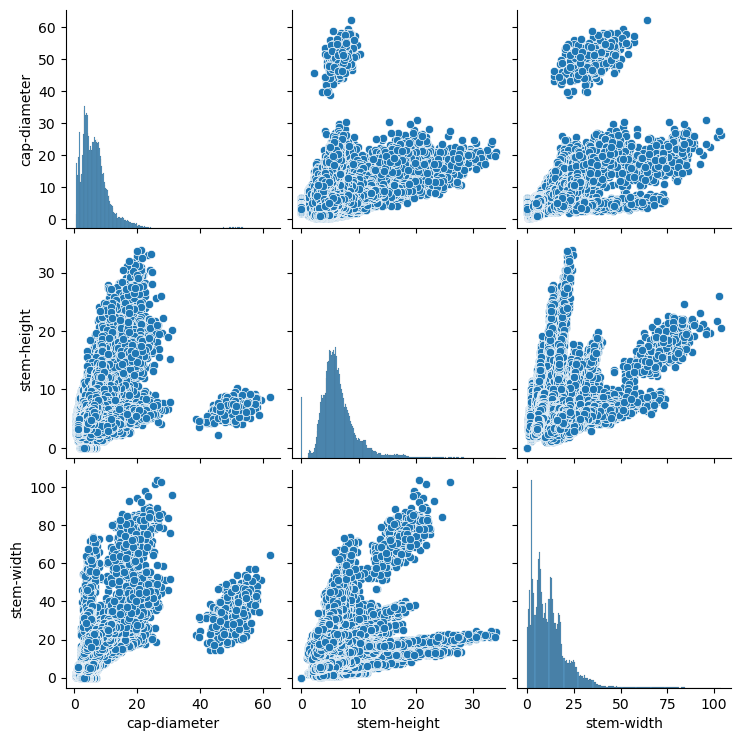

In [11]:
# this plot is drawn only for numerical column
sns.pairplot(data=train)
plt.show()

here we analyse the corelation between the columns

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-surface          22945 non-null  object 
 12  stem-color            61069 non-null  object 
 13  has-ring              61069 non-null  object 
 14  ring-type             58598 non-null  object 
 15  habitat            

In [13]:
train['cap-surface'].value_counts() # we check for the counts and here the most repeated
  # is t (highest value)

t    8196
s    7608
y    6341
h    4974
g    4724
d    4432
e    2584
k    2303
i    2225
w    2150
l    1412
Name: cap-surface, dtype: int64

In [14]:
train['cap-surface'].fillna('t', inplace=True) # so here we fill the column with most 
#repeated one (here it is t)

similarly we do that for all the null value colums, to fill the nulls

In [15]:
train['gill-attachment'].value_counts()

a    12698
d    10247
x     7413
p     6001
e     5648
s     5648
f     3530
Name: gill-attachment, dtype: int64

In [16]:
train['gill-attachment'].fillna('a', inplace=True)

In [17]:
train['gill-spacing'].value_counts()
train['gill-spacing'].fillna('c', inplace=True)

In [18]:
train['stem-surface'].value_counts()
train['stem-surface'].fillna('s', inplace=True)

In [19]:
train['ring-type'].value_counts()
train['ring-type'].fillna('f', inplace=True)

In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           61069 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       61069 non-null  object 
 7   gill-spacing          61069 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-surface          61069 non-null  object 
 12  stem-color            61069 non-null  object 
 13  has-ring              61069 non-null  object 
 14  ring-type             61069 non-null  object 
 15  habitat            

now we are ploting the graph between the all columns to analyse the data

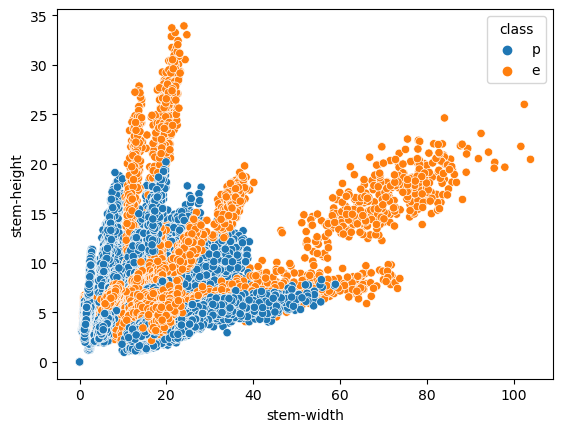

In [21]:
sns.scatterplot(x =train['stem-width'], y = train['stem-height'], hue='class', data=train)
plt.show()

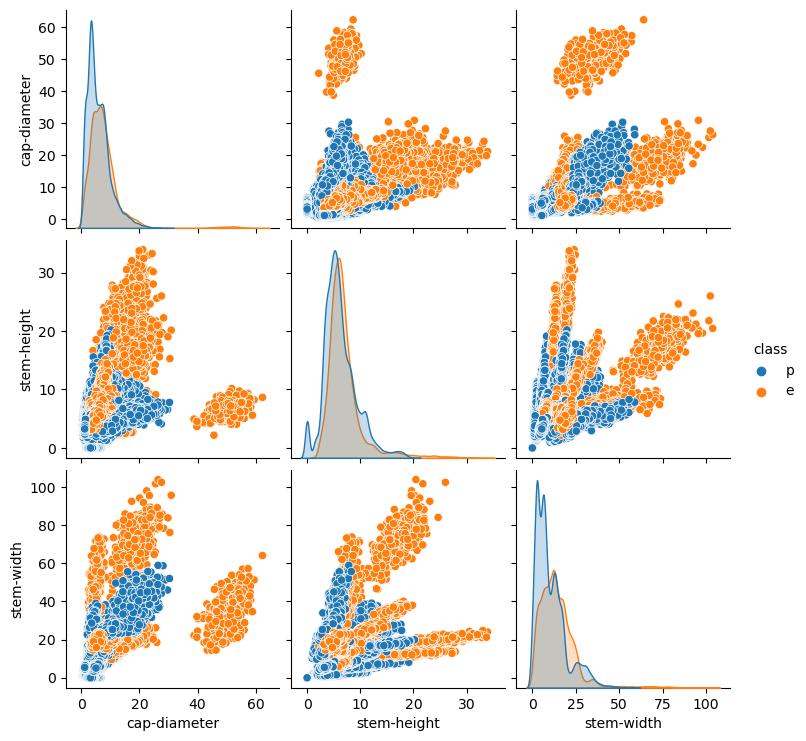

In [22]:
sns.pairplot(data=train, hue='class')

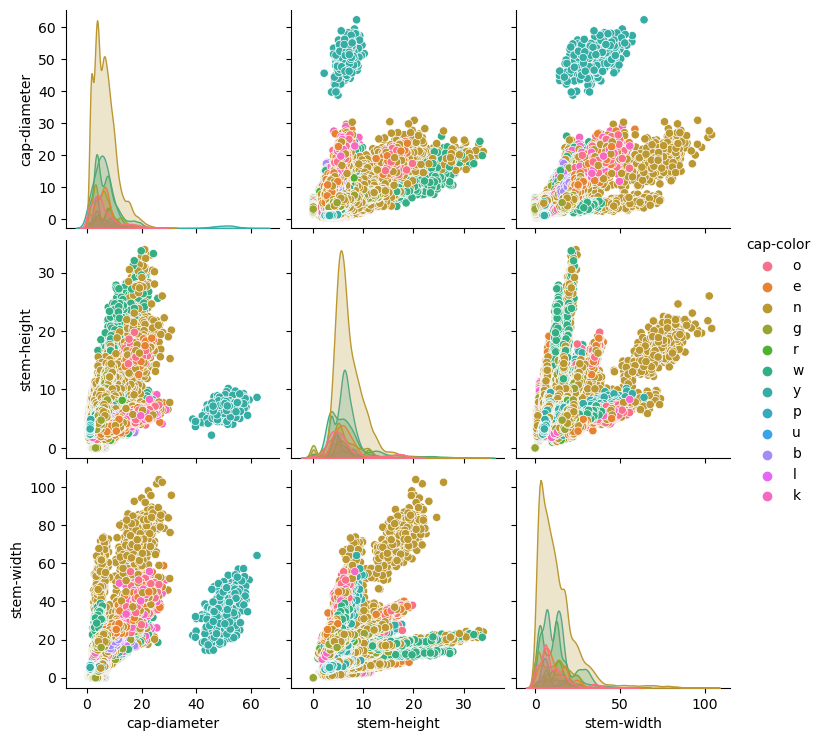

In [23]:
sns.pairplot(data=train, hue='cap-color')

here it is plotting the graph so we can analyse the data is non linear
(for us we have to plot this kind of graph for whatever column and should analyse for these kind of data sets)